In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

In [2]:
PATH = 'Downloads/AirQualityUCI_csv.csv'

In [3]:
df = pd.read_csv(PATH, delimiter = ';')

In [4]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


0 Date	(DD/MM/YYYY) 
1 Time	(HH.MM.SS) 
2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 
3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)	
4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 
5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 
6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)	
7 True hourly averaged NOx concentration in ppb (reference analyzer) 
8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 
9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)	
10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)	
11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 
12 Temperature in Â°C	
13 Relative Humidity (%) 
14 AH Absolute Humidity 



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


As the last two columns do not contain any values, let's delete them. Also let's clear out the null values.

In [6]:
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis = 1)
df = df.dropna(axis = 0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
dtypes: float64(8), object(7)
memory usage: 1.1+ MB


In [7]:
len(set(df['Date']))

391

Therefore, the dataset consists of 391 days of readings.

From the Actual Values of concentration of various gases, let's forecast temperature. Before that, let's set the date-time as index.

In [8]:
format_date_time = '%d/%m/%Y %H.%M.%S'
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format = format_date_time)
df = df.set_index('DateTime')
df.head(40)
#df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time']
#df['Datetime'] = pd.to_datetime(df['Date'], 'Time']])
#df = df.set_index('Datetime')
#df = df.drop(['Date', 'Time'], axis = 1)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
2004-03-10 19:00:00,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2004-03-10 20:00:00,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
2004-03-10 21:00:00,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
2004-03-10 22:00:00,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
2004-03-10 23:00:00,10/03/2004,23.00.00,"1,2",1197.0,38.0,"4,7",750.0,89.0,1337.0,96.0,1393.0,949.0,"11,2","59,2","0,7848"
2004-03-11 00:00:00,11/03/2004,00.00.00,"1,2",1185.0,31.0,"3,6",690.0,62.0,1462.0,77.0,1333.0,733.0,"11,3","56,8","0,7603"
2004-03-11 01:00:00,11/03/2004,01.00.00,1,1136.0,31.0,"3,3",672.0,62.0,1453.0,76.0,1333.0,730.0,"10,7","60,0","0,7702"
2004-03-11 02:00:00,11/03/2004,02.00.00,"0,9",1094.0,24.0,"2,3",609.0,45.0,1579.0,60.0,1276.0,620.0,"10,7","59,7","0,7648"


Let's delete Date and Time columns

In [9]:
df = df.drop(['Date', 'Time'], axis = 1)

Now, let's get feature columns. The features are the actual concentration of various gases in the air. Also let's consider target.

In [10]:
df_for_modelling = df[['CO(GT)', 'NMHC(GT)', 'C6H6(GT)', 'NOx(GT)', 'NO2(GT)', 'T']]
df_for_modelling.head()

,CO(GT),NMHC(GT),C6H6(GT),NOx(GT),NO2(GT),T
DateTime,,,,,,
2004-03-10 18:00:00,"2,6",150.0,"11,9",166.0,113.0,"13,6"
2004-03-10 19:00:00,2,112.0,"9,4",103.0,92.0,"13,3"
2004-03-10 20:00:00,"2,2",88.0,"9,0",131.0,114.0,"11,9"
2004-03-10 21:00:00,"2,2",80.0,"9,2",172.0,122.0,"11,0"
2004-03-10 22:00:00,"1,6",51.0,"6,5",131.0,116.0,"11,2"


The target variable is the actual temperatute.

Let's analyze the actual features and target.

In [11]:
df_clean = df_for_modelling.replace(-200.0, np.nan)
df_clean = df_clean.replace('-200', np.nan)
df_clean = df_clean.replace('-200,0', np.nan)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 6 columns):
CO(GT)      7674 non-null object
NMHC(GT)    914 non-null float64
C6H6(GT)    8991 non-null object
NOx(GT)     7718 non-null float64
NO2(GT)     7715 non-null float64
T           8991 non-null object
dtypes: float64(3), object(3)
memory usage: 511.7+ KB


NHMC(GT) has very few non-null values. Thus, this feature is not very useful in predicting temperature. Hence, let's drop this feature.

In [13]:
df_clean = df_clean.drop('NMHC(GT)', axis = 1)

In [14]:
df_clean = df_clean.dropna(axis = 0)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6941 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 5 columns):
CO(GT)      6941 non-null object
C6H6(GT)    6941 non-null object
NOx(GT)     6941 non-null float64
NO2(GT)     6941 non-null float64
T           6941 non-null object
dtypes: float64(2), object(3)
memory usage: 325.4+ KB


CO(GT) and C6H6(GT) and T are not numeric. Let's convert them to numeric features.

In [15]:
df_clean.describe()

,NOx(GT),NO2(GT)
count,6941.000000,6941.000000
mean,250.671949,113.874082
std,208.611371,47.475017
min,2.000000,2.000000
25%,103.000000,79.000000
50%,186.000000,110.000000
75%,335.000000,142.000000
max,1479.000000,333.000000


In [16]:
#a = features['CO(GT)'][0].split(',')[0] + '.' + features['CO(GT)'][0].split(',')[1]
#type(a)
def convert_to_numeric_with_decimal(col):
    l = [col[i].split(',')[0] + '.0' if len(col[i].split(',')) == 1 else col[i].split(',')[0] + '.' + col[i].split(',')[1] for i in range(len(col))]
    l = [float(l[i]) for i in range(len(l))]
    return l
CO_GT = convert_to_numeric_with_decimal(df_clean['CO(GT)'])
C6H6_GT = convert_to_numeric_with_decimal(df_clean['C6H6(GT)'])
T_1 = convert_to_numeric_with_decimal(df_clean['T'])

In [17]:
df_num = df_clean.drop(['CO(GT)', 'C6H6(GT)', 'T'], axis = 1)
df_num['CO(GT)'] = CO_GT
df_num['C6H6(GT)'] = C6H6_GT
df_num['T'] = T_1
df_num.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6941 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 5 columns):
NOx(GT)     6941 non-null float64
NO2(GT)     6941 non-null float64
CO(GT)      6941 non-null float64
C6H6(GT)    6941 non-null float64
T           6941 non-null float64
dtypes: float64(5)
memory usage: 645.4 KB


Now, 

In [18]:
features = df_num.drop('T', axis = 1)
features.describe()

,NOx(GT),NO2(GT),CO(GT),C6H6(GT)
count,6941.000000,6941.000000,6941.000000,6941.000000
mean,250.671949,113.874082,2.182467,10.554488
std,208.611371,47.475017,1.441158,7.465226
min,2.000000,2.000000,0.100000,0.200000
25%,103.000000,79.000000,1.100000,4.900000
50%,186.000000,110.000000,1.900000,8.800000
75%,335.000000,142.000000,2.900000,14.600000
max,1479.000000,333.000000,11.900000,63.700000


In [19]:
target = df_num['T']
target.describe()

count    6941.000000
mean       17.755323
std         8.844909
min        -1.900000
25%        11.200000
50%        16.800000
75%        23.700000
max        44.600000
Name: T, dtype: float64

In [20]:
import matplotlib.pyplot as plt
target.plot()
plt.show()

<Figure size 640x480 with 1 Axes>

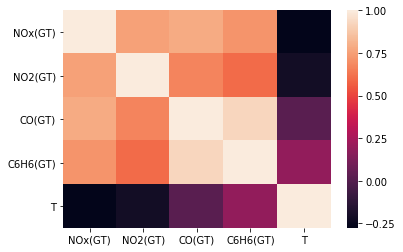

In [21]:
import seaborn as sns
sns.heatmap(df_num.corr())

Let's consider a date.

In [22]:
year = input('Enter a year ')
month = input('Enter a month ')
day = input('Enter a day ')

Enter a year2004
Enter a month05
Enter a day15


In [23]:
date = str(year) + '-' + str(month) + '-' + str(day)
date

'2004-05-15'

In [28]:
train_feat = features.loc[: date + ' ' + '00:00:00']
train_target = target.loc[: date + ' ' + '00:00:00']
test_feat = features.loc[date + ' ' + '00:00:00' : ]
test_target = target.loc[date + ' ' + '00:00:00' : ]

Renaming the columns of train and test dataframes as they will create scope name error in tensorflow.

In [57]:
train_feat.columns

Index(['NOx(GT)', 'NO2(GT)', 'CO(GT)', 'C6H6(GT)'], dtype='object')

In [60]:
train_feat = train_feat.rename(columns={"NOx(GT)": 'nox', "NO2(GT)": "nitrogendioxide", "CO(GT)": 'carbonmonooxide', "C6H6(GT)": 'benzene'})
test_feat = test_feat.rename(columns={"NOx(GT)": 'nox', "NO2(GT)": "nitrogendioxide", "CO(GT)": 'carbonmonooxide', "C6H6(GT)": 'benzene'})

In [61]:
import tensorflow.compat.v2.feature_column as fc
NUMERIC_COLUMNS = train_feat.columns
feature_columns = []
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))
    
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=False, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function  

train_input_fn = make_input_fn(train_feat, train_target, num_epochs=10, shuffle=False, batch_size=32)
eval_input_fn = make_input_fn(test_feat, test_target, num_epochs=1, shuffle=False)

In [68]:
model = tf.estimator.LinearRegressor(feature_columns=feature_columns, optimizer = 'Adam')

W0904 04:10:35.207909  4988 estimator.py:1799] Using temporary folder as model directory: C:\Users\WIN8~1.1\AppData\Local\Temp\tmpemmhoi3w


In [69]:
model.train(train_input_fn)

In [70]:
result = model.evaluate(eval_input_fn)
result

{'average_loss': 137.1834,
 'global_step': 370,
 'label/mean': 18.039083,
 'loss': 136.51144,
 'prediction/mean': 15.48762}